In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
from matplotlib import pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
import seaborn as sns
from teeplot import teeplot as tp

In [2]:
from dishpylib.pyhelpers import get_env_context
from dishpylib.pyhelpers import get_git_revision_hash
from dishpylib.pyhelpers import make_timestamp
from dishpylib.pyhelpers import print_runtime

In [3]:
print_runtime()

context: ci
hostname: 879fd5d404ff
interpreter: 3.8.15 (default, Oct 12 2022, 19:14:39)  [GCC 7.5.0]
revision: cde679bf0
timestamp: 2022-11-08T09:18:38Z00:00

IPython==7.16.1
boto3==1.14.44
botocore==1.17.44
iterdub==0.2.0
matplotlib==3.5.2
pandas==1.1.2
seaborn==0.11.2
teeplot==0.1.1


# get data

In [4]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/thread-profiles/stage=8+what=elaborated/',
)

In [5]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format(hash_pandas_object( df ).sum())
dfdigest

'-5b38a7939674d585'

In [6]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

In [7]:
df['Elapsed Update Std'] = df.groupby([
    'Series',
    'Stint',
])['Update'].transform('std') / df.groupby([
    'Series',
    'Stint',
])['Update'].transform('mean')

df['Elapsed Update Span'] = (df.groupby([
    'Series',
    'Stint',
])['Update'].transform('max') - df.groupby([
    'Series',
    'Stint',
])['Update'].transform('min')) / df.groupby([
    'Series',
    'Stint',
])['Update'].transform('mean')

# case study series 16005

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=elapsed-update-std+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=elapsed-update-std+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Elapsed Update Std'>

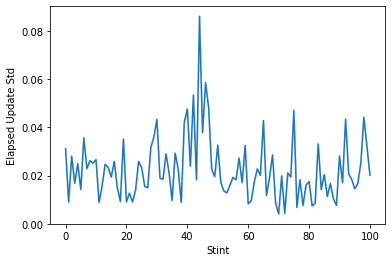

In [8]:
tp.tee(
    sns.lineplot,
    data=df[ df['Series'] == 16005 ],
    x='Stint',
    y='Elapsed Update Std',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=elapsed-update-span+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=elapsed-update-span+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Elapsed Update Span'>

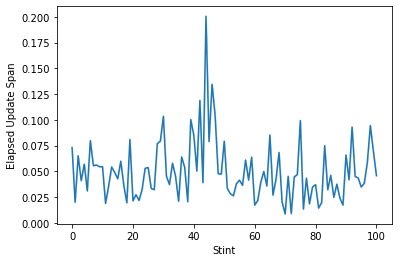

In [9]:
tp.tee(
    sns.lineplot,
    data=df[ df['Series'] == 16005 ],
    x='Stint',
    y='Elapsed Update Span',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

In [10]:
print('mean update std', df[ df['Series'] == 16005 ]['Elapsed Update Std'].mean())
print('mean update span', df[ df['Series'] == 16005 ]['Elapsed Update Span'].mean())

mean update std 0.022585260791035896
mean update span 0.049990232620249056


In [11]:
print('mean update std', df[ df['Series'] == 16005 ]['Elapsed Update Std'].max())
print('mean update span', df[ df['Series'] == 16005 ]['Elapsed Update Span'].max())

mean update std 0.08621807775514276
mean update span 0.20057157703299558
